In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

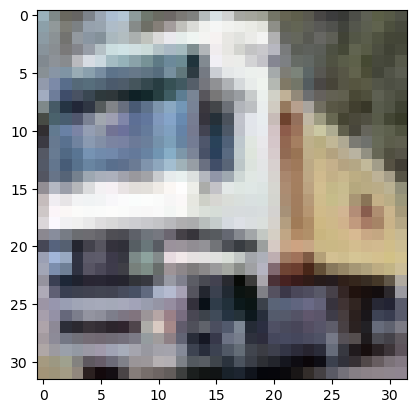

In [4]:
plt.imshow(X_train[1])

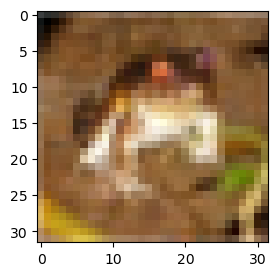

In [5]:
plt.figure(figsize=(15,3)),
plt.imshow(X_train[0])

In [6]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
classes[9]

'truck'

In [10]:
def plot_sample(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

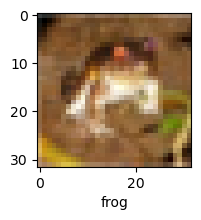

In [11]:
plot_sample(X_train, Y_train, 0)

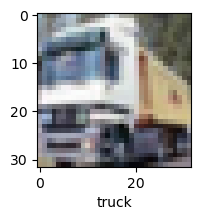

In [12]:
plot_sample(X_train, Y_train, 1)

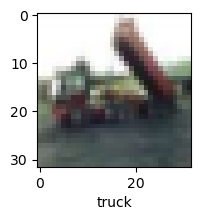

In [13]:
plot_sample(X_train, Y_train, 2)

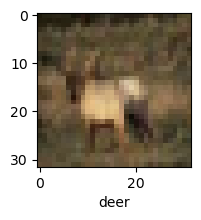

In [14]:
plot_sample(X_train, Y_train, 3)

In [15]:
X_train[0]/225

array([[[0.26222222, 0.27555556, 0.28      ],
        [0.19111111, 0.20444444, 0.2       ],
        [0.22222222, 0.21333333, 0.19111111],
        ...,
        [0.70222222, 0.58666667, 0.48      ],
        [0.67555556, 0.55555556, 0.45333333],
        [0.65777778, 0.55111111, 0.45777778]],

       [[0.07111111, 0.08888889, 0.08888889],
        [0.        , 0.        , 0.        ],
        [0.08      , 0.03555556, 0.        ],
        ...,
        [0.54666667, 0.39111111, 0.24444444],
        [0.52888889, 0.36888889, 0.22222222],
        [0.54222222, 0.38666667, 0.25333333]],

       [[0.11111111, 0.10666667, 0.09333333],
        [0.07111111, 0.03111111, 0.        ],
        [0.21777778, 0.12      , 0.03555556],
        ...,
        [0.52444444, 0.37333333, 0.22222222],
        [0.53333333, 0.37333333, 0.22222222],
        [0.48444444, 0.32444444, 0.18666667]],

       ...,

       [[0.92444444, 0.75555556, 0.42666667],
        [0.89333333, 0.68      , 0.15111111],
        [0.88      , 0

In [16]:
X_train = X_train /225
X_test = X_test /225


In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train, Y_train, epochs=5)

C:\Users\rajab\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3070 - loss: 1.9299
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4227 - loss: 1.6336
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.4544 - loss: 1.5441
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4747 - loss: 1.4818
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4992 - loss: 1.4253


In [18]:
ann.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4904 - loss: 1.4311


[1.4394856691360474, 0.4887999892234802]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("classification Report:\n", classification_report(Y_test, Y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
classification Report:
               precision    recall  f1-score   support

           0       0.57      0.56      0.56      1000
           1       0.72      0.46      0.56      1000
           2       0.48      0.16      0.24      1000
           3       0.34      0.38      0.36      1000
           4       0.37      0.55      0.44      1000
           5       0.40      0.36      0.38      1000
           6       0.54      0.49      0.52      1000
           7       0.57      0.57      0.57      1000
           8       0.58      0.67      0.62      1000
           9       0.47      0.68      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [20]:
cnn = models.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])


In [21]:
(0.45)/ (0.45+0.67)

0.40178571428571425

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pickle


In [23]:
# Function to unpickle the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Load training and test data
def load_cifar10_data():
    train_data = []
    train_labels = []
    for i in range(1, 6):
        batch = unpickle(f'data_batch_{i}')
        train_data.extend(batch[b'data'])
        train_labels.extend(batch[b'labels'])

    test_batch = unpickle('test_batch')
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)

In [24]:
# Preprocess the data
def preprocess_data(train_data, test_data):
    # Normalize pixel values to be between 0 and 1
    train_data = train_data / 255.0
    test_data = test_data / 255.0

    # Reshape the data to (32, 32, 3) for image dimensions
    train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    return train_data, test_data


In [25]:
# Build a simple CNN model
def build_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    return model

In [26]:
# Train and evaluate the model
def train_and_evaluate_model(model, train_data, train_labels, test_data, test_labels):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))
    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc}')


In [28]:
# Main program
if __name__ == "__main__":
    # Load CIFAR-10 data
    train_data, train_labels, test_data, test_labels = load_cifar10_data()

    # Preprocess the data
    train_data, test_data = preprocess_data(train_data, test_data)

    # Build the CNN model
    model = build_cnn_model()

    # Train and evaluate the model
    train_and_evaluate_model(model, train_data, train_labels, test_data, test_labels)

C:\Users\rajab\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3544 - loss: 1.7605 - val_accuracy: 0.5292 - val_loss: 1.3059
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5739 - loss: 1.2026 - val_accuracy: 0.6105 - val_loss: 1.0790
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6440 - loss: 1.0058 - val_accuracy: 0.6395 - val_loss: 1.0255
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6816 - loss: 0.9021 - val_accuracy: 0.6630 - val_loss: 0.9594
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7129 - loss: 0.8185 - val_accuracy: 0.6819 - val_loss: 0.9168
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7354 - loss: 0.7542 - val_accuracy: 0.6996 - val_loss: 0.8685
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7552 - loss: 0.6955 - val_accuracy: 0.7050 - val_loss: 0.8556
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7715 -

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [30]:
# Function to unpickle the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Load training and test data
def load_cifar10_data():
    train_data = []
    train_labels = []
    for i in range(1, 6):
        batch = unpickle(f'data_batch_{i}')
        train_data.extend(batch[b'data'])
        train_labels.extend(batch[b'labels'])

    test_batch = unpickle('test_batch')
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)

In [31]:
# Preprocess the data
def preprocess_data(train_data, test_data):
    # Normalize pixel values to be between 0 and 1
    train_data = train_data / 255.0
    test_data = test_data / 255.0

    # Reshape the data to (32, 32, 3) for image dimensions
    train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    return train_data, test_data

# Build a simple CNN model
def build_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    return model


In [32]:
# Train and evaluate the model
def train_and_evaluate_model(model, train_data, train_labels, test_data, test_labels):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))
    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc}')

# Plot specific images by class name
def plot_images_by_class(images, labels, class_name, num_images=5):
    class_indices = np.where(np.array(label_names) == class_name)[0]
    selected_indices = np.random.choice(class_indices, num_images, replace=False)

    plt.figure(figsize=(10, 2))
    for i, index in enumerate(selected_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        plt.title(f'Class: {label_names[labels[index]]}')
        plt.axis('off')
    plt.show()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3512 - loss: 1.7560 - val_accuracy: 0.5663 - val_loss: 1.2033
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5753 - loss: 1.1919 - val_accuracy: 0.6295 - val_loss: 1.0471
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6419 - loss: 1.0212 - val_accuracy: 0.6530 - val_loss: 1.0011
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6811 - loss: 0.9137 - val_accuracy: 0.6853 - val_loss: 0.9191
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7075 - loss: 0.8421 - val_accuracy: 0.6975 - val_loss: 0.8779
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7276 - loss: 0.7800 - val_accuracy: 0.6995 - val_loss: 0.8733
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7438 - loss: 0.7387 - val_accuracy: 0.7007 - val_loss: 0.8673
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7600 -

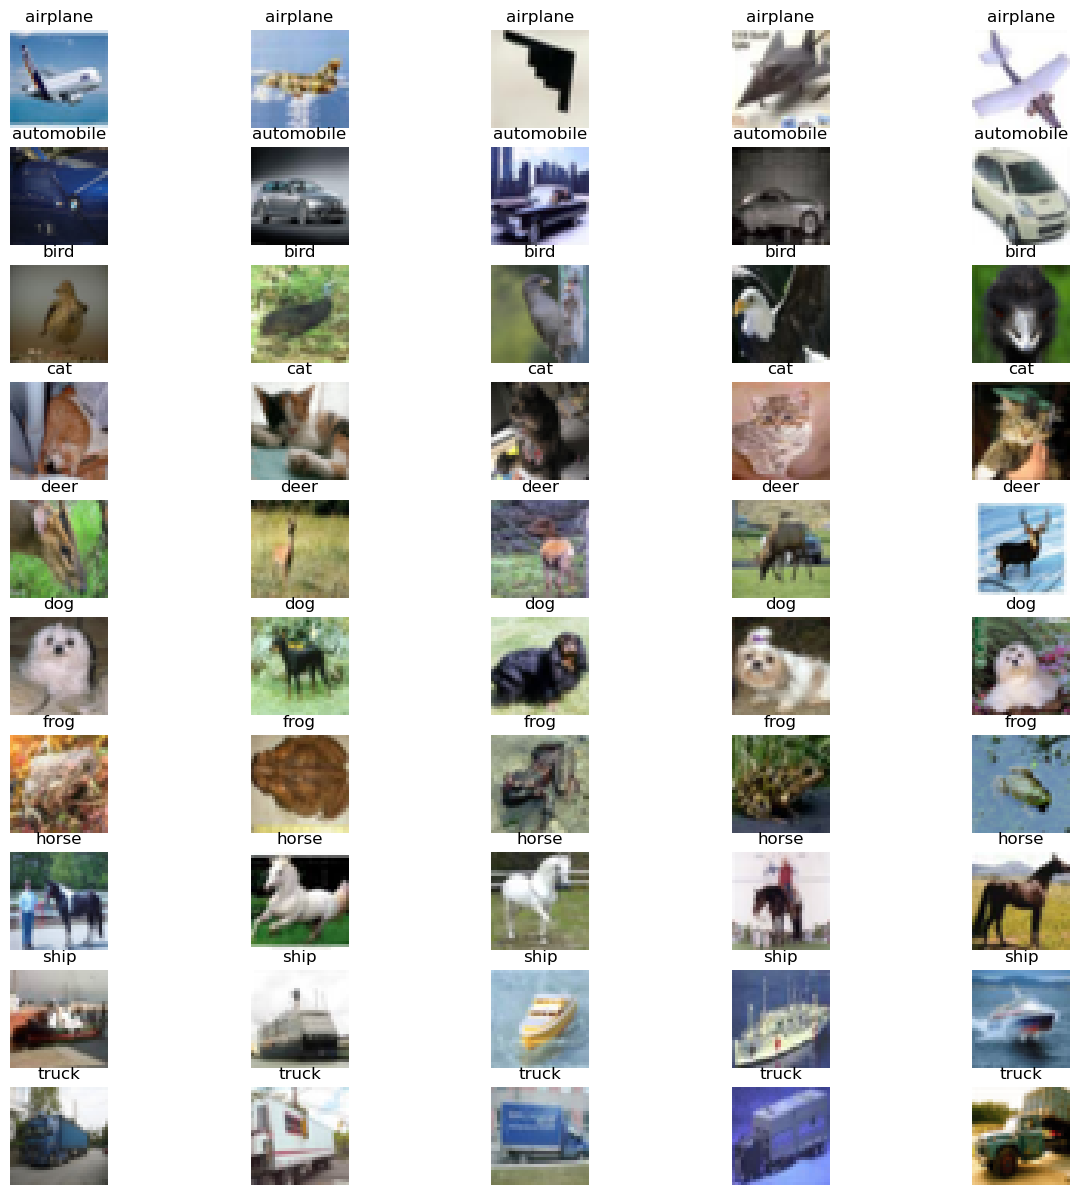

In [37]:
# Plot specific images by class name
def plot_images_by_classes(images, labels, class_names, num_images_per_class=5):
    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(class_names):
        class_index = label_names.index(class_name.encode('utf-8'))
        class_indices = np.where(labels == class_index)[0]
        selected_indices = np.random.choice(class_indices, num_images_per_class, replace=False)

        for j, index in enumerate(selected_indices):
            plt.subplot(10, num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(images[index])
            plt.title(class_name)
            plt.axis('off')

    plt.show()

# Main program
if __name__ == "__main__":
    # Load CIFAR-10 data
    train_data, train_labels, test_data, test_labels = load_cifar10_data()

    # Preprocess the data
    train_data, test_data = preprocess_data(train_data, test_data)

    # Build the CNN model
    model = build_cnn_model()

    # Train and evaluate the model
    train_and_evaluate_model(model, train_data, train_labels, test_data, test_labels)

    # Plot 5 images for each of the 10 classes with class names displayed
    label_names = unpickle('batches.meta')[b'label_names']
    class_names = [name.decode('utf-8') for name in label_names]
    plot_images_by_classes(test_data, test_labels, class_names, num_images_per_class=5)
